In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import easyocr

ModuleNotFoundError: No module named 'easyocr'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
from pathlib import Path
import cv2



e:\Coding\Python\MachineLearning_SC


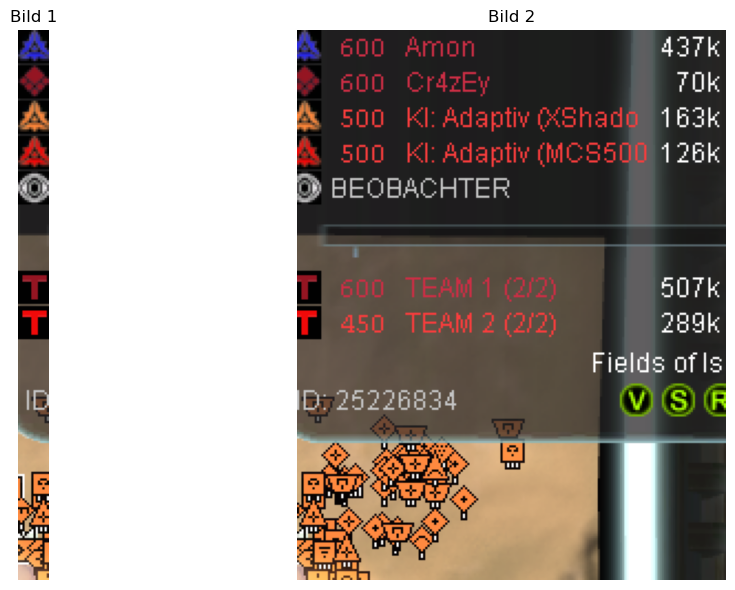

In [ ]:

parent_dir = Path.cwd().parent
print(parent_dir)
file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-16_15-36-40" / "screenshot_20250916_154109.png"


pfad = r"pictures/screenshot_20250911_025258.png"
pfad = str(file_path)

img = mpimg.imread(pfad)
height, width, _ = img.shape

# Players
crop_top = int(height * 0.07)  #  oben
crop_bottom = int(height * (1 - 0.7))  #  unten
crop_left = int(width * 0.768)  #  links
crop_right = int(width * (1 - 0.225))  #  rechts
# Bild zuschneiden
players = img[crop_top:crop_bottom, crop_left:crop_right]

# Power
crop_top = int(height * 0.07)  #  oben
crop_bottom = int(height * (1 - 0.7))  #  unten
crop_left = int(width * 0.77)  #  links
crop_right = int(width * (1 - 0.129))  #  rechts
# Bild zuschneiden
power = img[crop_top:crop_bottom, crop_left:crop_right]


def conv_img(cropped_img,alpha = 0.3):
    scaled_img = (cropped_img * 255).astype(np.uint8)
    new_image = cv2.convertScaleAbs(scaled_img, alpha=alpha, beta=1)
    return new_image

players = conv_img(players, alpha=1)
power = conv_img(power, alpha=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(players)
axes[0].set_title("Bild 1")
axes[0].axis("off")

axes[1].imshow(power)
axes[1].set_title("Bild 2")
axes[1].axis("off")

cv2.imwrite("pictures/cropped.png", cv2.cvtColor(power, cv2.COLOR_RGB2BGR))  # Konvertiere zurück zu BGR für OpenCV
# Plot anzeigen
plt.tight_layout()
plt.show()

In [ ]:
reader = easyocr.Reader(['en'], gpu=True)  # Initialisiere den OCR-Leser
result = reader.readtext(power, allowlist='0123456789km.')  

In [ ]:
for res in result:
    print(res[0][0][0],"/",res[0][1][0]," --- ",res[1])  

19 / 43  ---  600
47 / 83  ---  kmm
163 / 194  ---  437k
19 / 43  ---  600
49 / 91  ---  14218
171 / 194  ---  70k
19 / 43  ---  500
47 / 157  ---  k14...088k.
171 / 194  ---  63k
19 / 43  ---  500
47 / 161  ---  k4..km08500
171 / 194  ---  26k
15 / 98  ---  084.48
19 / 43  ---  
49 / 83  ---  
93 / 119  ---  
163 / 194  ---  507k
19 / 83  ---  
93 / 121  ---  
163 / 194  ---  289k
131 / 185  ---  6kk8064
1 / 75  ---  0325226834


In [ ]:
class Colors:
    @staticmethod
    def red():
        return (239, 8, 8)

    @staticmethod
    def darkred():
        return (148, 20, 33)

    @staticmethod
    def orange():
        return (255, 134, 57)

    @staticmethod
    def darkorange():
        return (181, 101, 24)

    @staticmethod
    def darkgold():
        return (165, 150, 0)

    @staticmethod
    def yellow():
        return (255, 251, 0)

    @staticmethod
    def lime():
        return (156, 219, 0)

    @staticmethod
    def green():
        return (66, 190, 66)

    @staticmethod
    def darkgreen():
        return (41, 138, 82)

    @staticmethod
    def teal():
        return (41, 77, 74)

    @staticmethod
    def darkteal():
        return (41, 77, 74) #idk

    @staticmethod
    def blue():
        return (66, 109, 239)

    @staticmethod
    def darkblue():
        return (41, 40, 231)

    @staticmethod
    def purple():
        return (90, 0, 165)

    @staticmethod
    def violet():
        return (148, 97, 255)

    @staticmethod
    def turkis():
        return (99, 255, 206)

    @staticmethod
    def white():
        return (255, 255, 255)

    @staticmethod
    def gray():
        return (99, 109, 123)

    @staticmethod
    def magenta():
        return (255, 138, 255)

    @staticmethod
    def pink():
        return (255, 48, 255)
class Colors2:
    @staticmethod
    def red():
        return (240, 41, 40)

    @staticmethod
    def darkred():
        return (150, 48, 58)

    @staticmethod
    def orange():
        return (255, 135, 58)

    @staticmethod
    def darkorange():
        return (182, 109, 51)

    @staticmethod
    def darkgold():
        return (165, 152, 45)

    @staticmethod
    def yellow():
        return (255, 252, 48)

    @staticmethod
    def lime():
        return (157, 220, 43)

    @staticmethod
    def green():
        return (67, 191, 67)

    @staticmethod
    def darkgreen():
        return (88, 139, 86)

    @staticmethod
    def teal():
        return (64, 91, 88) #idk

    @staticmethod
    def blue():
        return (67, 110, 240)

    @staticmethod
    def darkblue():
        return (88, 80, 232)

    @staticmethod
    def purple():
        return (105, 74, 166)

    @staticmethod
    def violet():
        return (149, 98, 255)

    @staticmethod
    def turkis():
        return (111, 255, 207)

    @staticmethod
    def white():
        return (255, 255, 255)

    @staticmethod
    def gray():
        return (99, 109, 123)

    @staticmethod
    def magenta():
        return (255, 138, 255)

    @staticmethod
    def pink():
        return (255, 48, 255)
    @staticmethod
    def eye():
        return (240, 236, 240)


In [ ]:
data = pd.DataFrame(columns=["elo", "name", "power"])
i = 0

#res[0][1][0] == 184 für ende der schrift, machmal nur 175  

i = 0
count =0
while True:
    if i >= len(result):
        break
    if result[i][0][1][0] == np.int32(184) or result[i][0][1][0] == np.int32(175) or result[i][0][1][0] == np.int32(177):
        print(result[i][1])
        count +=1
    
    i+=1
    

# DataFrame ausgeben
print("count:",count)

count: 0


## Easyocr

NameError: name 'reader' is not defined

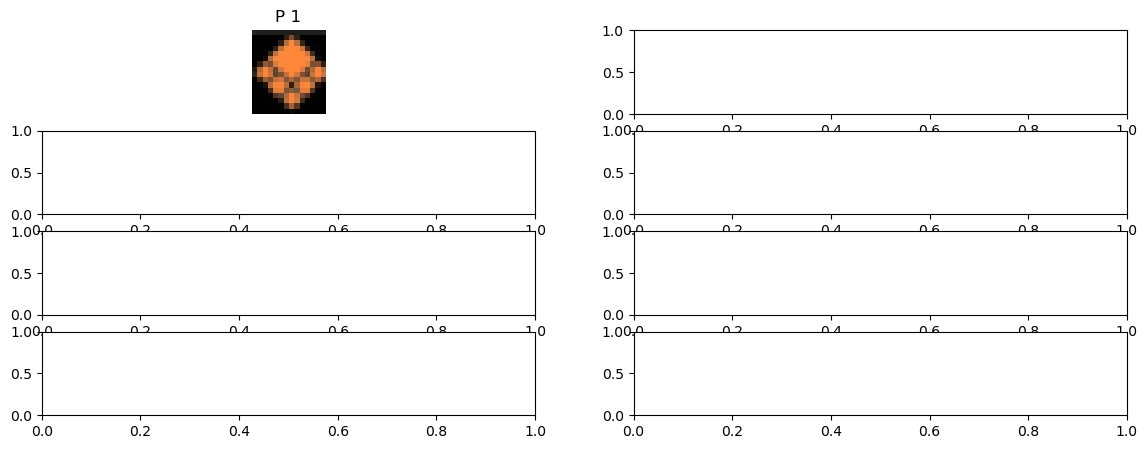

In [ ]:

parent_dir = Path.cwd().parent
# 4 v 4
file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-16_15-36-40" / "screenshot_20250916_154109.png"
# 6 v 6
#file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-11_02-44-10" / "screenshot_20250911_024441.png"
# 6v6 mid game
file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-11_02-44-10" / "screenshot_20250911_025206.png"

# big game
#file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-17_16-10-25" / "screenshot_20250917_161057.png"

# game with problems
file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-17_20-51-31" / "screenshot_20250917_205220.png"


#pfad = r"pictures/leaderboardfull.png"
pfad = str(file_path)

def get_color(image):
    colors2 = Colors2()
    black_mask = np.all(image == [0, 0, 0], axis=-1)

    non_black_pixels = image[~black_mask]
    #avg_color = np.mean(non_black_pixels, axis=0).astype(np.uint8)
    
    brightest_color = np.max(non_black_pixels, axis=0).astype(np.uint8)
    color_name = "unknown"
    
    # versuch 1 -> threshold für die farbkanäle -> klappt nicht weil unterschiedliche spiel logos
    # for func_name in dir(colors2):
    #     if func_name.startswith("__"):
    #         continue
    #     color_value = np.array(getattr(colors2, func_name)())
    #     channel_diff = np.abs(brightest_color - color_value)
    #     if channel_diff[0] < 5 and channel_diff[1] < 5 and channel_diff[2] < 50:
    #         color_name = func_name
    #         break
    
    # versuch 2 -> euklidische distanz
    cs = []
    for func_name in dir(colors2):
        if func_name.startswith("__"):
            continue
        cs.append((func_name, getattr(colors2, func_name)()))
    
    min_value_score = 255**3
    min_value = []
    for c in cs:
        dist = np.array(brightest_color) - np.array(c[1])
        temp = 0
        for d in dist:
            temp = temp + d*d
        if min_value_score > temp:
            min_value_score = temp
            color_name = c[0]
            min_value = c


    new_image = np.zeros_like(image)
    new_image[:, :] = brightest_color 

    return new_image,color_name

def get_number(image):
    #white = np.array([255, 255, 255])
    white = np.array([1, 1, 1])
    diff = np.abs(image - white)  # Differenz zu Weiß berechnen
    mask = np.all(diff < 0.6, axis=-1)  # Prüfen, ob alle Kanäle innerhalb des Thresholds liegen

    # Neues Bild erstellen: Weiße Pixel bleiben, andere werden schwarz
    result = np.zeros_like(image)  # Alles schwarz
    result[mask] = white 
    result = (result * 255).astype(np.uint8)
    height, width = result.shape[:2]
    new_width = int(width * 3)
    new_height = int(height * 3)
    #result = cv2.resize(result, (new_width, new_height), interpolation=cv2.INTER_CUBIC) # sehr wichtig sonst gehts nicht
    
    scale_factor = 4
    result = cv2.resize(result, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    

    result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    _, result = cv2.threshold(result, 10, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_not(result)
    #result = cv2.GaussianBlur(result, (3,3), 0)
    #result = cv2.blur(result,(5,5))
    text = reader.readtext(result, allowlist='0123456789km.',text_threshold=0.3,
                           filter_ths=0.001,
                           link_threshold=0.3)  
    
    return result,text
    

img = mpimg.imread(pfad)
height, width, _ = img.shape

next = abs((1-0.0689) - 0.9163)
num = 2#17
colors = Colors()
cs = []
for func_name in dir(colors):
    if func_name.startswith("__"):
        continue
    cs.append((func_name, getattr(colors, func_name)()))

fig, axes = plt.subplots(4,num,  figsize=(14, 5))
for i in range(num):
    # Players
    crop_top = int(height * (0.0689+(next*i)))  #  oben
    crop_bottom = int(height * (1 - (0.9163-(next*i))))  #  unten
    crop_left = int(width * 0.768)  #  links
    crop_right = int(width * (1 - 0.225))  #  rechts
    
    # Power
    crop_top2 = int(height * (0.0689+(next*i)))  #  oben
    crop_bottom2 = int(height * (1 - (0.9163-(next*i))))  #  unten
    crop_left2 = int(width * 0.85)  #  links
    crop_right2 = int(width * (1 - 0.126))  #  rechts
    
    # Timer
    
    # Bild zuschneiden
    players = img[crop_top:crop_bottom, crop_left:crop_right]
    power = img[crop_top2:crop_bottom2, crop_left2:crop_right2]

    def conv_img(cropped_img,alpha = 0.3):
        scaled_img = (cropped_img * 255).astype(np.uint8)
        new_image = cv2.convertScaleAbs(scaled_img, alpha=alpha, beta=1)
        return new_image

    players = conv_img(players, alpha=1)
    color_pic,color_name = get_color(players)
    if color_name == "eye":
        break
    
    axes[0, i].imshow(players)
    axes[0, i].set_title(f"P {i+1}")
    axes[0, i].axis("off")  # Achsen ausblenden
    
    #power = conv_img(power)
    power,text = get_number(power)
    axes[1, i].imshow(power)
    if text ==[]:
        axes[1, i].set_title(f"none")
    else:
        axes[1, i].set_title(f"{text[0][1]}")
    axes[1, i].axis("off")  # Achsen ausblenden
    
    
    
    
    
    # Bild in der zweiten Zeile anzeigen
    axes[2, i].imshow(color_pic)
    axes[2, i].set_title(f"{color_name}\n{color_pic[0,0]}",fontsize=8)
    axes[2, i].axis("off")  # Achsen ausblenden
    
    # alle farben aus leaderboard
    new_image = np.zeros_like(players)
    new_image[:, :] = cs[i][1]
    axes[3, i].imshow(new_image)
    axes[3, i].set_title(f"{cs[i][0]}")
    axes[3, i].axis("off")  # Achsen ausblenden
    
plt.tight_layout()
plt.show()


#cv2.imwrite("pictures/cropped.png", cv2.cvtColor(power, cv2.COLOR_RGB2BGR))  # Konvertiere zurück zu BGR für OpenCV
# Plot anzeigen


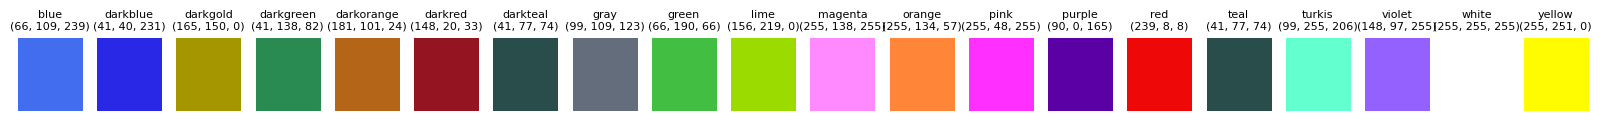

In [ ]:

img = mpimg.imread(pfad)
height, width, _ = img.shape

next = abs((1-0.0689) - 0.9163)
colors = Colors()
cs = []
for func_name in dir(colors):
    if func_name.startswith("__"):
        continue
    cs.append((func_name, getattr(colors, func_name)()))
fig, axes = plt.subplots(1,cs.__len__(),  figsize=(16, 3))
for i in range(cs.__len__()): 
    new_image = np.zeros_like(players)
    new_image[:, :] = cs[i][1]
    axes[i].imshow(new_image)
    axes[i].set_title(f"{cs[i][0]}\n{cs[i][1]}", fontsize=8)
    axes[i].axis("off")  # Achsen ausblenden
    
plt.tight_layout()
plt.show()

## paddleocr

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
from pathlib import Path
import cv2


from paddleocr import PaddleOCR

ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False)


class Colors:
    @staticmethod
    def red():
        return (239, 8, 8)

    @staticmethod
    def darkred():
        return (148, 20, 33)

    @staticmethod
    def orange():
        return (255, 134, 57)

    @staticmethod
    def darkorange():
        return (181, 101, 24)

    @staticmethod
    def darkgold():
        return (165, 150, 0)

    @staticmethod
    def yellow():
        return (255, 251, 0)

    @staticmethod
    def lime():
        return (156, 219, 0)

    @staticmethod
    def green():
        return (66, 190, 66)

    @staticmethod
    def darkgreen():
        return (41, 138, 82)

    @staticmethod
    def teal():
        return (41, 77, 74)

    @staticmethod
    def darkteal():
        return (41, 77, 74) #idk

    @staticmethod
    def blue():
        return (66, 109, 239)

    @staticmethod
    def darkblue():
        return (41, 40, 231)

    @staticmethod
    def purple():
        return (90, 0, 165)

    @staticmethod
    def violet():
        return (148, 97, 255)

    @staticmethod
    def turkis():
        return (99, 255, 206)

    @staticmethod
    def white():
        return (255, 255, 255)

    @staticmethod
    def gray():
        return (99, 109, 123)

    @staticmethod
    def magenta():
        return (255, 138, 255)

    @staticmethod
    def pink():
        return (255, 48, 255)
class Colors2:
    @staticmethod
    def red():
        return (240, 41, 40)

    @staticmethod
    def darkred():
        return (150, 48, 58)

    @staticmethod
    def orange():
        return (255, 135, 58)

    @staticmethod
    def darkorange():
        return (182, 109, 51)

    @staticmethod
    def darkgold():
        return (165, 152, 45)

    @staticmethod
    def yellow():
        return (255, 252, 48)

    @staticmethod
    def lime():
        return (157, 220, 43)

    @staticmethod
    def green():
        return (67, 191, 67)

    @staticmethod
    def darkgreen():
        return (88, 139, 86)

    @staticmethod
    def teal():
        return (64, 91, 88) #idk

    @staticmethod
    def blue():
        return (67, 110, 240)

    @staticmethod
    def darkblue():
        return (88, 80, 232)

    @staticmethod
    def purple():
        return (105, 74, 166)

    @staticmethod
    def violet():
        return (149, 98, 255)

    @staticmethod
    def turkis():
        return (111, 255, 207)

    @staticmethod
    def white():
        return (255, 255, 255)

    @staticmethod
    def gray():
        return (99, 109, 123)

    @staticmethod
    def magenta():
        return (255, 138, 255)

    @staticmethod
    def pink():
        return (255, 48, 255)
    @staticmethod
    def eye():
        return (240, 236, 240)


Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\amonp\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\amonp\.paddlex\official_models\PP-OCRv5_server_rec`.


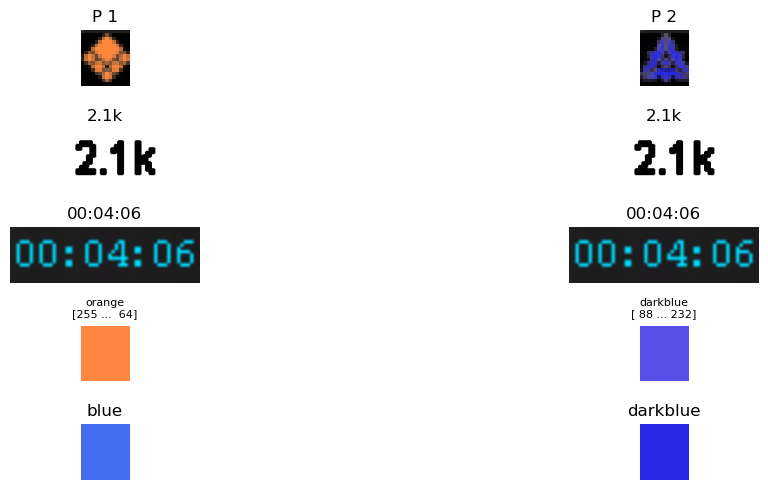

In [ ]:



parent_dir = Path.cwd().parent
# 4 v 4
file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-16_15-36-40" / "screenshot_20250916_154109.png"
# 6 v 6
#file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-11_02-44-10" / "screenshot_20250911_024441.png"
# 6v6 mid game
file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-11_02-44-10" / "screenshot_20250911_025206.png"

# big game
#file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-17_16-10-25" / "screenshot_20250917_161057.png"

# game with problems
file_path = parent_dir / "data" / "raw" / "screenshots" / "Session_5s_2025-09-17_20-51-31" / "screenshot_20250917_205220.png"


#pfad = r"pictures/leaderboardfull.png"
pfad = str(file_path)

def get_color(image):
    colors2 = Colors2()
    black_mask = np.all(image == [0, 0, 0], axis=-1)

    non_black_pixels = image[~black_mask]
    #avg_color = np.mean(non_black_pixels, axis=0).astype(np.uint8)
    
    brightest_color = np.max(non_black_pixels, axis=0).astype(np.uint8)
    color_name = "unknown"
    
    # versuch 2 -> euklidische distanz
    cs = []
    for func_name in dir(colors2):
        if func_name.startswith("__"):
            continue
        cs.append((func_name, getattr(colors2, func_name)()))
    
    min_value_score = 255**3
    min_value = []
    for c in cs:
        dist = np.array(brightest_color) - np.array(c[1])
        temp = 0
        for d in dist:
            temp = temp + d*d
        if min_value_score > temp:
            min_value_score = temp
            color_name = c[0]
            min_value = c


    new_image = np.zeros_like(image)
    new_image[:, :] = brightest_color 

    return new_image,color_name

def get_time(result):

    result = (result * 255).astype(np.uint8)
    scale_factor = 4
    result = cv2.resize(result, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

    text = ocr.predict(result)  
    text = text[0]["rec_texts"]
    if text == []:
        text = np.nan
    else:
        text = text[0]
    return result,text
   

def get_number(image):
    #white = np.array([255, 255, 255])
    white = np.array([1, 1, 1])
    diff = np.abs(image - white)  # Differenz zu Weiß berechnen
    mask = np.all(diff < 0.6, axis=-1)  # Prüfen, ob alle Kanäle innerhalb des Thresholds liegen

    # Neues Bild erstellen: Weiße Pixel bleiben, andere werden schwarz
    result = np.zeros_like(image)  # Alles schwarz
    result[mask] = white 
    result = (result * 255).astype(np.uint8)
    height, width = result.shape[:2]
    new_width = int(width * 3)
    new_height = int(height * 3)
    #result = cv2.resize(result, (new_width, new_height), interpolation=cv2.INTER_CUBIC) # sehr wichtig sonst gehts nicht
    
    scale_factor = 4
    result = cv2.resize(result, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    

    result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    _, result = cv2.threshold(result, 10, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_not(result)
    #result = cv2.GaussianBlur(result, (3,3), 0)
    #result = cv2.blur(result,(5,5))
    result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
    
    text = ocr.predict(result)  
    text = text[0]["rec_texts"]
    if text == []:
        text = np.nan
    else:
        text = text[0]
    return result,text
    

img = mpimg.imread(pfad)
height, width, _ = img.shape

next = abs((1-0.0689) - 0.9163)
num = 2#17
colors = Colors()
cs = []
for func_name in dir(colors):
    if func_name.startswith("__"):
        continue
    cs.append((func_name, getattr(colors, func_name)()))

fig, axes = plt.subplots(5,num,  figsize=(14, 5))
for i in range(num):
    # Players
    crop_top = int(height * (0.0689+(next*i)))  #  oben
    crop_bottom = int(height * (1 - (0.9163-(next*i))))  #  unten
    crop_left = int(width * 0.768)  #  links
    crop_right = int(width * (1 - 0.225))  #  rechts
    
    # Power
    crop_top2 = int(height * (0.0689+(next*i)))  #  oben
    crop_bottom2 = int(height * (1 - (0.9163-(next*i))))  #  unten
    crop_left2 = int(width * 0.85)  #  links
    crop_right2 = int(width * (1 - 0.126))  #  rechts
    
    # Time
    crop_top3 = int(height * (0.035))  #  oben
    crop_bottom3 = int(height * (1 - (0.95)))  #  unten
    crop_left3 = int(width * 0.776)  #  links
    crop_right3 = int(width * (1 - 0.194))  #  rechts
    
    
    # Bild zuschneiden
    players = img[crop_top:crop_bottom, crop_left:crop_right]
    power = img[crop_top2:crop_bottom2, crop_left2:crop_right2]
    time = img[crop_top3:crop_bottom3, crop_left3:crop_right3]
    
    def conv_img(cropped_img,alpha = 0.3):
        scaled_img = (cropped_img * 255).astype(np.uint8)
        new_image = cv2.convertScaleAbs(scaled_img, alpha=alpha, beta=1)
        return new_image

    players = conv_img(players, alpha=1)
    color_pic,color_name = get_color(players)
    if color_name == "eye":
        break
    
    axes[0, i].imshow(players)
    axes[0, i].set_title(f"P {i+1}")
    axes[0, i].axis("off")  # Achsen ausblenden
    
    #power = conv_img(power)
    #power = conv_img(power)
    power,text = get_number(power)
    axes[1, i].imshow(power)
    if text ==[]:
        axes[1, i].set_title(f"none")
    else:
        axes[1, i].set_title(f"{text}")
    axes[1, i].axis("off")  # Achsen ausblenden
    
    
    time, text = get_time(time)
    axes[2, i].imshow(time)
    if text ==[]:
        axes[2, i].set_title(f"none")
    else:
        axes[2, i].set_title(f"{text}")
    axes[2, i].axis("off")  # Achsen ausblenden
    
    # Bild in der zweiten Zeile anzeigen
    axes[3, i].imshow(color_pic)
    axes[3, i].set_title(f"{color_name}\n{color_pic[0,0]}",fontsize=8)
    axes[3, i].axis("off")  # Achsen ausblenden
    
    # alle farben aus leaderboard
    new_image = np.zeros_like(players)
    new_image[:, :] = cs[i][1]
    axes[4, i].imshow(new_image)
    axes[4, i].set_title(f"{cs[i][0]}")
    axes[4, i].axis("off")  # Achsen ausblenden
plt.tight_layout()
plt.show()